# 2) Data Wrangling II

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Create an “Academic performance” dataset of students and perform the following operations using Python.

In [2]:
data = {'Name': ['Tom', 'Nick', 'Krish', 'Jack','Will','Mike','Jim'],
        'Surname': ['Pure','Ugle','Shinkar','Sharma','Bhamre','Sutane','Soni'],
        'address': ['Pune',np.nan,'Mumbai','Delhi','Nashik','Tokyo','Agra'],
        'Age': [20, 21, 19, 18,22,21,22],
        'Maths': [76,np.nan,87,45,54,57,67],
        'English': [67,47,100,81,64,78,-99],
        'Science': [np.nan,75,59,43,35,46,56],
        'Hindi': [64,76,400,58,49,79,np.nan],
        'Sanskrit': [46,56,np.nan,89,56,98,47],
        'SST': [56,47,84,np.nan,78,26,75]}
df=pd.DataFrame(data)
df

,Name,Surname,address,Age,Maths,English,Science,Hindi,Sanskrit,SST
0,Tom,Pure,Pune,20,76.0,67,NaN,64.0,46.0,56.0
1,Nick,Ugle,NaN,21,NaN,47,75.0,76.0,56.0,47.0
2,Krish,Shinkar,Mumbai,19,87.0,100,59.0,400.0,NaN,84.0
3,Jack,Sharma,Delhi,18,45.0,81,43.0,58.0,89.0,NaN
4,Will,Bhamre,Nashik,22,54.0,64,35.0,49.0,56.0,78.0
5,Mike,Sutane,Tokyo,21,57.0,78,46.0,79.0,98.0,26.0
6,Jim,Soni,Agra,22,67.0,-99,56.0,NaN,47.0,75.0


#### 1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.

In [3]:
null_mask = df.isnull().any(axis=1)
null_row = df[null_mask]
null_row

,Name,Surname,address,Age,Maths,English,Science,Hindi,Sanskrit,SST
0,Tom,Pure,Pune,20,76.0,67,NaN,64.0,46.0,56.0
1,Nick,Ugle,NaN,21,NaN,47,75.0,76.0,56.0,47.0
2,Krish,Shinkar,Mumbai,19,87.0,100,59.0,400.0,NaN,84.0
3,Jack,Sharma,Delhi,18,45.0,81,43.0,58.0,89.0,NaN
6,Jim,Soni,Agra,22,67.0,-99,56.0,NaN,47.0,75.0


In [4]:
mean_maths = df["Maths"].mean()

In [5]:
df['address'] = df['address'].fillna(method='ffill')
df['Maths']=df['Maths'].fillna(df["Maths"].mean())
df['English']=df['English'].fillna(df["English"].mean())
df['Science']=df['Science'].fillna(df["Science"].mean())
df['Hindi']=df['Hindi'].fillna(df["Hindi"].mean())
df['Sanskrit']=df['Sanskrit'].fillna(df["Sanskrit"].mean())
df['SST']=df['SST'].fillna(df["SST"].mean())
df

,Name,Surname,address,Age,Maths,English,Science,Hindi,Sanskrit,SST
0,Tom,Pure,Pune,20,76.000000,67,52.333333,64.0,46.000000,56.0
1,Nick,Ugle,Pune,21,64.333333,47,75.000000,76.0,56.000000,47.0
2,Krish,Shinkar,Mumbai,19,87.000000,100,59.000000,400.0,65.333333,84.0
3,Jack,Sharma,Delhi,18,45.000000,81,43.000000,58.0,89.000000,61.0
4,Will,Bhamre,Nashik,22,54.000000,64,35.000000,49.0,56.000000,78.0
5,Mike,Sutane,Tokyo,21,57.000000,78,46.000000,79.0,98.000000,26.0
6,Jim,Soni,Agra,22,67.000000,-99,56.000000,121.0,47.000000,75.0


#### 2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.

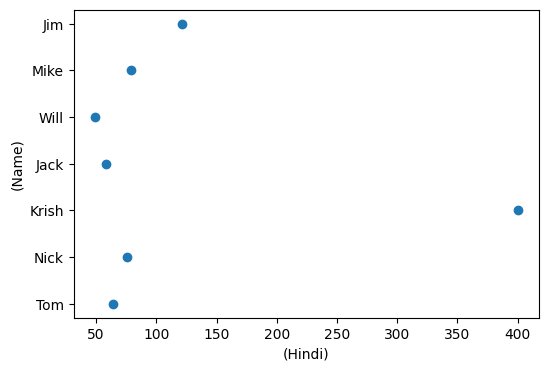

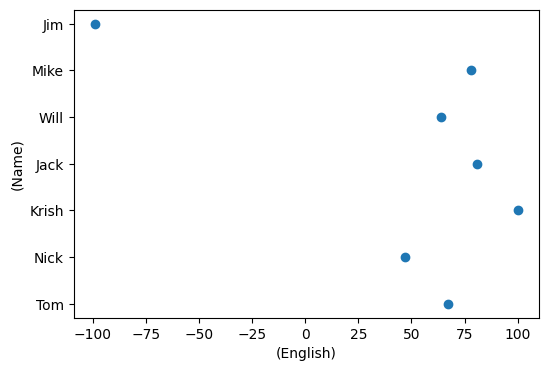

In [6]:
fig, ax = plt.subplots(figsize=(6,4))
fig, ax2 = plt.subplots(figsize=(6,4))

ax.scatter(df['Hindi'], df['Name'])
ax.set_xlabel('(Hindi)')
ax.set_ylabel('(Name)')

ax2.scatter(df['English'], df['Name'])
ax2.set_xlabel('(English)')
ax2.set_ylabel('(Name)')

plt.show()

In [7]:
num_var= df.select_dtypes(include=['int64','float64']).columns
num_var

Index(['Age', 'Maths', 'English', 'Science', 'Hindi', 'Sanskrit', 'SST'], dtype='object')

In [8]:
for column in num_var:
    print('column: ',column)
    
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    IQR=q3-q1
    
    lower_bound= q1-1.5*IQR
    higher_bound= q3+1.5*IQR
    outliers = df[(df[column]< lower_bound)|(df[column]> higher_bound)][column]
    print('outliers are: ',outliers,'\n')

column:  Age
outliers are:  Series([], Name: Age, dtype: int64) 

column:  Maths
outliers are:  Series([], Name: Maths, dtype: float64) 

column:  English
outliers are:  6   -99
Name: English, dtype: int64 

column:  Science
outliers are:  Series([], Name: Science, dtype: float64) 

column:  Hindi
outliers are:  2    400.0
Name: Hindi, dtype: float64 

column:  Sanskrit
outliers are:  Series([], Name: Sanskrit, dtype: float64) 

column:  SST
outliers are:  Series([], Name: SST, dtype: float64) 



In [9]:
upper_limit = 100
lower_limit = 0
print(upper_limit)
print(lower_limit)

100
0


In [19]:
df['Hindi'] = np.where(df['Hindi'] > upper_limit,
   upper_limit,
   np.where(
       df['Hindi'] < lower_limit,
       lower_limit,
       df['Hindi']
   )
)

In [20]:
df

,Name,Surname,address,Age,Maths,English,Science,Hindi,Sanskrit,SST
0,Tom,Pure,Pune,20,76.000000,67,52.333333,64.0,46.000000,56.0
1,Nick,Ugle,Pune,21,64.333333,47,75.000000,76.0,56.000000,47.0
2,Krish,Shinkar,Mumbai,19,87.000000,100,59.000000,100.0,65.333333,84.0
3,Jack,Sharma,Delhi,18,45.000000,81,43.000000,58.0,89.000000,61.0
4,Will,Bhamre,Nashik,22,54.000000,64,35.000000,49.0,56.000000,78.0
5,Mike,Sutane,Tokyo,21,57.000000,78,46.000000,79.0,98.000000,26.0
6,Jim,Soni,Agra,22,67.000000,-99,56.000000,100.0,47.000000,75.0
